# Project 2: Predicting Algae Growth with Classification

#### Dataset: https://www.kaggle.com/datasets/rukenmissonnier/research-on-algae-growth-in-the-laboratory

## Section 1- Preprocessing and Understanding Data

In [511]:
# Import relevant libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns

In [513]:
# Load the relevant dataset into a pandas DataFrame
df = pd.read_csv("/Users/work/DataMining/algeas.csv")

df.head()

Light  Nitrate  Iron  Phosphate  Temperature    pH   CO2  Population
0  1011.00     1.11  0.17       0.08        23.39  7.27  9.22     4736.51
1  1206.50     3.29  0.14       0.04        14.74  7.94  9.59     4677.34
2  1450.63     1.67  0.04       0.02        28.58  7.35  4.46     3388.85
3  1158.40     2.48  0.09       0.06        27.18  7.43  6.34     4899.17
4  1159.92     2.15  0.15       0.08        22.52  7.92  6.46     4974.25

In [515]:
df.tail()

Light  Nitrate  Iron  Phosphate  Temperature    pH   CO2  Population
9779   368.58     4.94  0.08       0.02        14.34  7.61  3.21     2920.22
9780  1733.12     5.25  0.01       0.06        22.20  7.74  9.91     2093.47
9781  1898.45     1.90  0.11       0.05        18.53  7.39  7.78      777.25
9782  1832.10     6.08  0.15       0.13        22.63  7.04  4.77     1607.65
9783   467.72     7.71  0.12       0.06        11.52  7.37  3.05     3615.62

In [517]:
# Check the shape of the dataset (number of rows and columns)
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")


Dataset contains 9784 rows and 8 columns.



In [519]:
# Check for missing values in each column
print(df.isnull().sum())

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64


In [521]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [523]:
# Get information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


In [525]:
# Basic statistics for columns
df.describe().transpose()

count         mean          std    min       25%      50%  \
Light        9784.0  1026.172916   565.252246  40.25   539.925  1023.78   
Nitrate      9784.0     4.493676     2.003815   1.00     2.760     4.53   
Iron         9784.0     0.102977     0.056221   0.01     0.050     0.10   
Phosphate    9784.0     0.105244     0.054843   0.01     0.060     0.11   
Temperature  9784.0    19.974967     5.756035  10.00    14.960    20.01   
pH           9784.0     7.502310     0.286528   7.00     7.260     7.50   
CO2          9784.0     6.008941     2.299361   2.01     4.040     6.02   
Population   9784.0  3161.595503  1460.094323   0.00  2055.460  3565.39   

                  75%      max  
Light        1516.085  2009.86  
Nitrate         6.210     8.00  
Iron            0.150     0.20  
Phosphate       0.150     0.20  
Temperature    25.000    29.99  
pH              7.750     8.00  
CO2             7.980    10.00  
Population   4374.555  5250.44

In [527]:
# Since this dataset is primarily numerical values, check for outliers
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).sum(axis=0)  # Count outliers per column
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 [0 0 0 0 0 0 0 0]


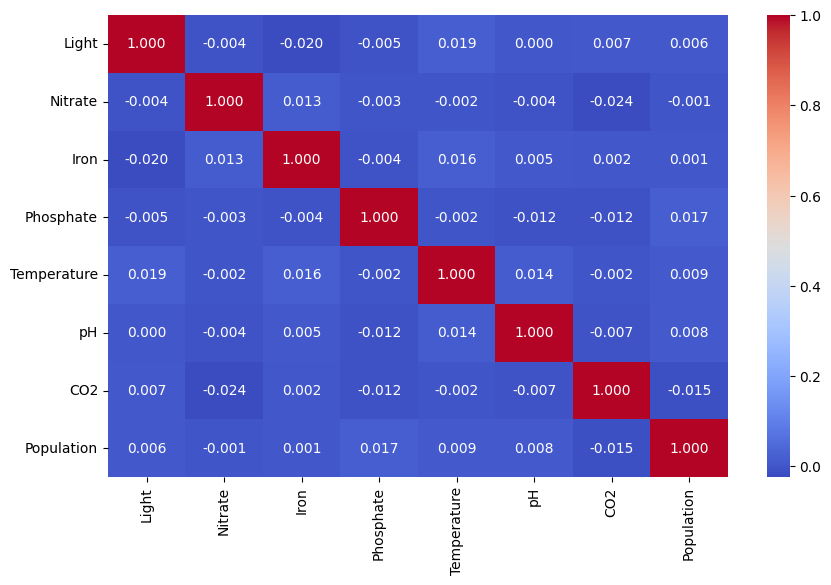

In [529]:
# Visualize how strongly each factor is related to the target variable, Algae Population
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

In [530]:
# Creates pairwise scatterplots 
plt.figure(figsize=(12, 9))
sns.pairplot(df)
plt.show()

<Figure size 1200x900 with 0 Axes>

In [531]:
# Focus on the target variable
plt.figure(figsize=(10, 5)) 

# Histogram for Population
plt.subplot(1, 2, 1)  
sns.histplot(df["Population"], bins=30, kde=True, color="purple")

# Boxplot for Population
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Population"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Population", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

In [532]:
# Convert the target variable, Algae Population, which is now continuous into a categorical variable
df['Population_Class'] = pd.qcut(df['Population'], q=5, labels=['1: Very Low', '2: Low', '3: Medium', '4: High', '5: Very High'])

#Check the new column labels for the first 5 elements
print(df[['Population', 'Population_Class']].head())

#Check the distribution of values in each bin
print(df['Population_Class'].value_counts())

   Population Population_Class
0     4736.51     5: Very High
1     4677.34     5: Very High
2     3388.85        3: Medium
3     4899.17     5: Very High
4     4974.25     5: Very High
Population_Class
1: Very Low     1957
2: Low          1957
4: High         1957
5: Very High    1957
3: Medium       1956
Name: count, dtype: int64


In [533]:
# Using the categorical Population variable, create pairplots
df_no_pop = df.drop(columns=['Population'])
sns.pairplot(df_no_pop, hue='Population_Class', diag_kind="kde")
plt.show()

In [534]:
# Create arrays for features and target
X = df.drop(['Population', 'Population_Class'], axis=1)  
y = df['Population_Class']

## Section 2- Random Forest Classification

In [536]:
# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier model and train model
rf = RandomForestClassifier(random_state=42, max_depth=20)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [537]:
# Make predictions based on the test data
y_pred_rf = rf.predict(X_test)

In [538]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.721


In [540]:
# Check for overfitting by comparing the training vs. testing accuracy
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

Training Accuracy: 0.996
Testing Accuracy: 0.721


In [541]:
# Since the model is overfit, find the best hyperparameters for the model
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 15, 20],  # Tree depth
    'min_samples_split': [5, 10, 15, 20],  # Minimum samples to split a node
    'min_samples_leaf': [5, 10, 15, 20]  # Minimum samples per leaf
}
rf_1 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_1, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,  # Use all processors
    verbose=0  # Only show necessary information
)

grid_search.fit(X_train, y_train)

# These are the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}


In [542]:
# Create a Random Forest Classifier model using the best hyperparameters and train model
best_rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20,  
    min_samples_split=20,  
    min_samples_leaf=5, 
    random_state=42
)

best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=20,
                       n_estimators=200, random_state=42)

In [543]:
# Make predictions based on the test data using the best hyperparameters
y_pred_rf_best = best_rf.predict(X_test)

In [544]:
# Evaluate Performance
train_acc = best_rf.score(X_train, y_train)
test_acc = best_rf.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy: {test_acc:.3f}")

Training Accuracy: 0.905
Testing Accuracy: 0.722


In [545]:
# Show classification report
print("Classification Report:" )
print(classification_report(y_test, y_pred_rf_best))

# Classification Heatmap
report_df = pd.DataFrame(classification_report(y_test, y_pred_rf_best, output_dict=True)).T

report_df = report_df.drop(columns=['support'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".3f")
plt.title("Classification Report Heatmap - Random Forest Classifier")
plt.show()

Classification Report:
              precision    recall  f1-score   support

 1: Very Low       0.95      0.90      0.92       608
      2: Low       0.80      0.86      0.83       604
   3: Medium       0.71      0.70      0.71       572
     4: High       0.47      0.38      0.42       560
5: Very High       0.64      0.75      0.69       592

    accuracy                           0.72      2936
   macro avg       0.71      0.72      0.71      2936
weighted avg       0.72      0.72      0.72      2936



In [546]:
# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

class_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Algae Population - Random Forest Classifier")
plt.show()

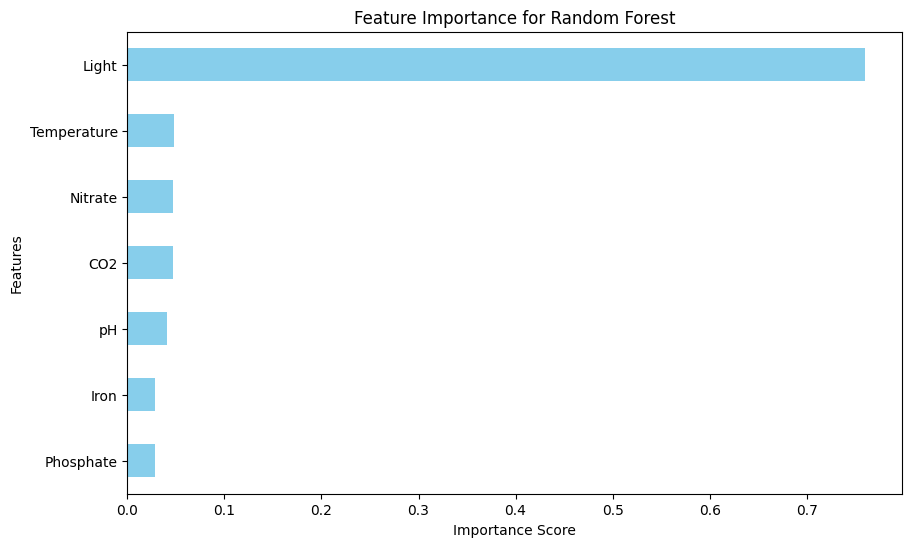

In [547]:
# Display which feature was most important
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Section 3- K-Nearest Neighbors  Classification

In [549]:
# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

# Create a KNN model with no scaling and train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [550]:
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

In [551]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.698


In [552]:
# Evaluate Performance
train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy: {test_acc:.3f}")

Training Accuracy: 0.789
Testing Accuracy: 0.698


In [553]:
# Test different types of scaling because KNN is a distance-based model
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = tts(X_scaled, y, test_size=0.3, random_state=42)
knn_scaled = KNeighborsClassifier(n_neighbors=15)
knn_scaled.fit(X_train_scaled, y_train_scaled)

# Normalize features
X_norm = normalize(X)
X_train_n, X_test_n, y_train_n, y_test_n = tts(X_norm, y, test_size=0.3, random_state=42)
knn_norm = KNeighborsClassifier(n_neighbors=15)
knn_norm.fit(X_train_n, y_train_n)

# Min Max scaling features
mm_scaler = MinMaxScaler()
X_minmax = mm_scaler.fit_transform(X)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = tts(X_minmax, y, test_size=0.3, random_state=42)
knn_mm = KNeighborsClassifier(n_neighbors=15)
knn_mm.fit(X_train_mm, y_train_mm)

print(f"Standardized Score: {knn_scaled.score(X_test_scaled, y_test_scaled)}")
print(f"Normalized Score: {knn_norm.score(X_test_n, y_test_n)}")
print(f"MinMaxScaler Score: {knn_mm.score(X_test_mm, y_test_mm)}")

Standardized Score: 0.46389645776566757
Normalized Score: 0.6365803814713896
MinMaxScaler Score: 0.4591280653950954


In [554]:
# Test different number of neighbors
accuracy_scores = []
k_values = range(5, 21)

for i in k_values:
    knn_2 = KNeighborsClassifier(n_neighbors=i)
    knn_2.fit(X_train, y_train)
    accuracy_scores.append(knn_2.score(X_test, y_test))
    print(f"{i}: {knn_2.score(X_test, y_test)}")
    
# Figure showing to visualize the accuracy score based on different number of neighbors
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='g')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy vs. k-Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

5: 0.6978882833787466
6: 0.6924386920980926
7: 0.7108310626702997
8: 0.7064032697547684
9: 0.7125340599455041
10: 0.7132152588555858
11: 0.7258174386920981
12: 0.7224114441416893
13: 0.7278610354223434
14: 0.7241144414168937
15: 0.7305858310626703
16: 0.7217302452316077
17: 0.7302452316076294
18: 0.7268392370572208
19: 0.726158038147139
20: 0.7258174386920981


In [555]:
# The highest accuracy is 15 so create KNN model and train data
knn_best = KNeighborsClassifier(n_neighbors=15)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [556]:
# Make predictions based on the test data using the best number of neighbors
y_pred_knn_best = knn_best.predict(X_test)

In [557]:
# Evaluate Performance
train_acc = knn_best.score(X_train, y_train)
test_acc = knn_best.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy: {test_acc:.3f}")

Training Accuracy: 0.755
Testing Accuracy: 0.731


Classification Report:
              precision    recall  f1-score   support

 1: Very Low       0.94      0.90      0.92       608
      2: Low       0.80      0.83      0.81       604
   3: Medium       0.70      0.72      0.71       572
     4: High       0.50      0.42      0.46       560
5: Very High       0.67      0.76      0.71       592

    accuracy                           0.73      2936
   macro avg       0.72      0.73      0.72      2936
weighted avg       0.73      0.73      0.73      2936



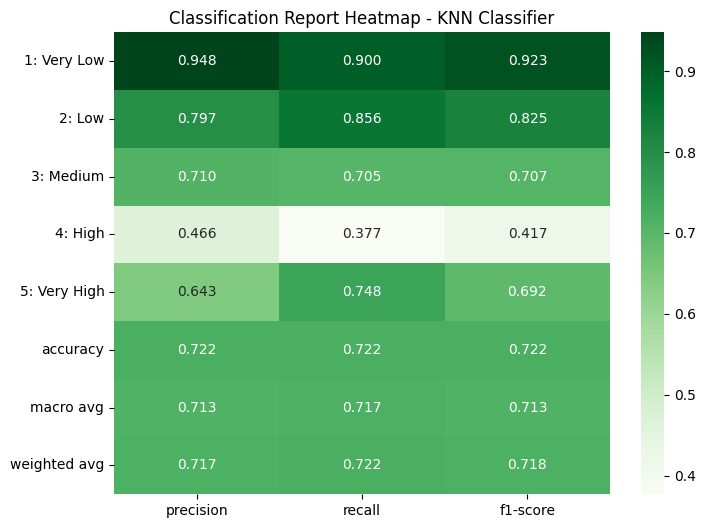

In [558]:
# Show classification report
print("Classification Report:" )
print(classification_report(y_test, y_pred_knn_best))

# Classification Heatmap
knn_report_df = pd.DataFrame(classification_report(y_test, y_pred_knn_best, output_dict=True)).T

knn_report_df = report_df.drop(columns=['support'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(knn_report_df, annot=True, cmap="Greens", fmt=".3f")
plt.title("Classification Report Heatmap - KNN Classifier")
plt.show()

In [559]:
# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_knn_best)

class_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Algae Population - KNN Classifier")
plt.show()